In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("training_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Text(0, 0.5, 'Loan Amount')

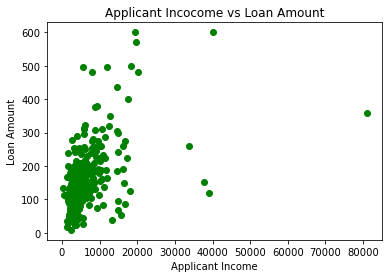

In [31]:
plt.scatter(df['ApplicantIncome'],df['LoanAmount'],color='green')
plt.title('Applicant Incocome vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')

In [38]:
Count=['Graduate','Not Graduate']
l=len(Count)
total_graduates=df[df['Education']=='Graduate']['Education'].count()
total_non_graduates=df[df['Education']=='Not Graduate']['Education'].count()
graduate_loanApproved=df[(df['Education']=='Graduate') & (df['Loan_Status']=='Y')]['Education'].count()
graduate_loanNotApproved=df[(df['Education']=='Graduate') & (df['Loan_Status']=='N')]['Education'].count()
Nongraduate_loanApproved=df[(df['Education']=='Not Graduate') & (df['Loan_Status']=='Y')]['Education'].count()
Nongraduate_loanNotApproved=df[(df['Education']=='Not Graduate') & (df['Loan_Status']=='N')]['Education'].count()
X=np.arange(l)

([<matplotlib.axis.XTick at 0x25e0132a280>,
 [Text(0, 0, 'Graduate'), Text(0, 0, 'Not Graduate')])

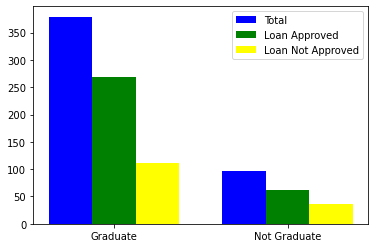

In [41]:
bar1=[total_graduates,total_non_graduates]
bar2=[graduate_loanApproved,Nongraduate_loanApproved]
bar3=[graduate_loanNotApproved,Nongraduate_loanNotApproved]
plt.bar(X,bar1,color='blue',width=0.25)
plt.bar(X + 0.25,bar2,color='green',width=0.25)
plt.bar(X + 0.5,bar3,color='yellow',width=0.25)
plt.legend(['Total' ,'Loan Approved' ,'Loan Not Approved'])
plt.xticks([0.25,1.25],Count)

Text(0.5, 1.0, 'Loan Status For Graduate and Non Graduate People')

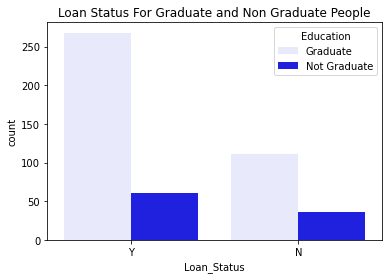

In [45]:
sns.countplot(df['Loan_Status'],hue=df['Education'],color='blue')
plt.title('Loan Status For Graduate and Non Graduate People')

Text(0, 0.5, 'Count')

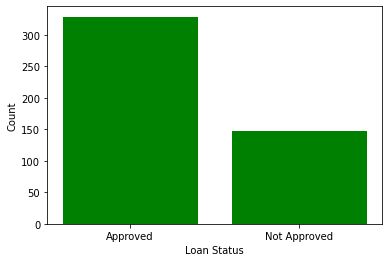

In [44]:
y= [df[df['Loan_Status']=='Y']['Loan_Status'].count(),df[df['Loan_Status']=='N']['Loan_Status'].count()]
plt.bar(['Approved','Not Approved'],y,color='green')
plt.xlabel('Loan Status')
plt.ylabel('Count')

Text(0.5, 1.0, 'Count of People according to Loan Status')

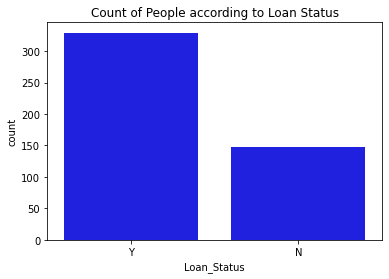

In [46]:
sns.countplot(df['Loan_Status'],color='blue')
plt.title('Count of People according to Loan Status')

In [59]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112888,0.496669,-0.010587,-0.055814
CoapplicantIncome,-0.112888,1.000000,0.188020,-0.005986,-0.009012
LoanAmount,0.496669,0.188020,1.000000,0.050229,-0.042090
Loan_Amount_Term,-0.010587,-0.005986,0.050229,1.000000,0.032014
Credit_History,-0.055814,-0.009012,-0.042090,0.032014,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x297a3c8d340>,
 'caps': [<matplotlib.lines.Line2D at 0x297a3c8da00>,
 'boxes': [<matplotlib.lines.Line2D at 0x297a3c7efa0>,
 'medians': [<matplotlib.lines.Line2D at 0x297a3c98100>,
 'fliers': [<matplotlib.lines.Line2D at 0x297a3c98400>,
 'means': []}

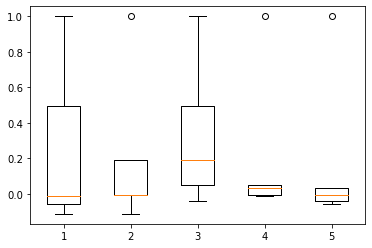

In [65]:
plt.boxplot(df.corr())

Where 1 is ApplicantIncome	

2 is CoapplicantIncome	

3 is LoanAmount

4 is Loan_Amount_Term	

5 is Credit_History	